In [1]:
import sys
import numpy as np
import logging
import warnings
warnings.filterwarnings("ignore", module="dynesty.sampling")
try:
    import snelib19odp
except ImportError:
    sys.path.append('../lib')
import snelib19odp.dataset as dataset
import snelib19odp.lc.observables as observables
import snelib19odp.dataset as dataset
import snelib19odp.mftools.ingest as ingest
import snelib19odp.utils as utils
import astropy.table as table

import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
#logging.basicConfig(level=logging.DEBUG)
import seaborn
import astropy.time as time
import astropy.units as u

import corner, os
import json
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#from tqdm import tqdm_notebook
from collections import OrderedDict
from mosfit.plotting import bandcolorf

sns.reset_orig()

plt.rcParams["font.family"] = "serif"
plt.rcParams.update({'font.size': 14})

In [63]:
ds19odp = dataset.load_dataset('SN2019odp_phot')
ds08d = dataset.load_dataset('SN2008D')
ds13bvn = dataset.load_dataset('iPTF13bvn')
#products_dir = '../products/mosfit_runs/19odp_allbands_ib_peak/1636489852'
products_dir = '../products/mosfit_runs/08d/1636576244'
bolometric_method = 'lyman'

params08d = ingest.load_params(os.path.join(products_dir, 'mosfit/products/walkers.json'))

products_dir = '../products/mosfit_runs/19odp_allbands/1636463588'
bolometric_method = 'lyman'

params19odp = ingest.load_params(os.path.join(products_dir, 'mosfit/products/walkers.json'))

products_dir = '../products/mosfit_runs/13bvn/1636452119'
bolometric_method = 'lyman'

params13bvn = ingest.load_params(os.path.join(products_dir, 'mosfit/products/walkers.json'))

       mjd         band   mag   mag_err  maglim telescope instrument
------------------ ---- ------- ------- ------- --------- ----------
58718.171532724984 UVW1 21.1707  0.3498 21.2422     Swift       UVOT
 58718.17296719598    U 20.4926  0.3356 20.6174     Swift       UVOT
58718.173944388516    B 18.9096  0.1832 19.9058     Swift       UVOT
 58718.17632610677 UVW2 22.8054  0.5947 22.0495     Swift       UVOT
 58718.17869199114    V 18.5903  0.2777  18.981     Swift       UVOT
 58718.18644587137 UVM2 22.4146  0.2873 22.7858     Swift       UVOT
58719.476249458734 UVW1 21.2914  0.2713 21.7586     Swift       UVOT
 58719.47768546175    U 20.6638  0.2699  21.086     Swift       UVOT
58719.478660993744    B 18.7056  0.1176 20.3376     Swift       UVOT
 58719.48103849823 UVW2 22.2051  0.3022 22.5072     Swift       UVOT
               ...  ...     ...     ...     ...       ...        ...
 58721.96560227778    U 19.6001  0.1871 20.6589     Swift       UVOT
 58721.96663642116    B 18.0553  0

In [61]:
def plot(ds, params):
    magbol = np.empty(1000)
    for i in range(1000):
        magbol[i] = ds.sample_abs_lc(bolometric_method, t_grid=(ds.first_detection_mjd+0))
    l_p = utils.convert_luminosity(np.nanmean(magbol))
    
    energy = 3/10 * params['mejecta'] * u.solMass.to(u.g) * (params['vejecta'] * u.km.to(u.cm))**2
    energy51 = energy/1e51

    radius = l_p/7e40/energy51**0.85 * params['mejecta']**0.67
    print(len(params), radius.shape)
    plt.hist(radius, label=ds.transient.name, alpha=0.5, bins=20)

4123 (4123,)
3384 (3384,)
3603 (3603,)


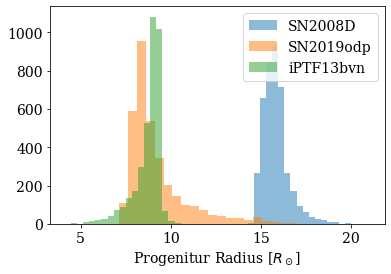

In [64]:
plot(ds08d, params08d)
plot(ds19odp, params19odp)
plot(ds13bvn, params13bvn)
plt.xlabel(r'Progenitur Radius [$R_\odot$]')
plt.legend()

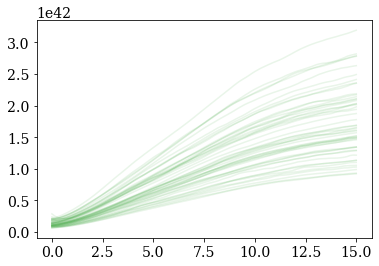

In [60]:
ds = ds13bvn
t_grid = np.linspace(ds.first_detection_mjd, ds.first_detection_mjd+15, 100)
for i in range(50):
    lc = ds.sample_abs_lc(bolometric_method, t_grid=t_grid)
    lums = utils.convert_luminosity(lc)
    plt.plot(t_grid - ds.first_detection_mjd, lums, alpha=0.1, color='tab:green')

In [2]:
0.2e15*u.cm.to(u.solRad)

2874.8023573379332